<a href="https://www.kaggle.com/code/b1nesh/bellabeat-case-study-python?scriptVersionId=138332865" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Case Study 2: How Can a Wellness Technology Company Play It Smart?
Capstone project done as a part of google data analytics course:<br>





### Ask Phase

The main issue at hand is figuring out how consumers use non-Bellabeat smart devices and how this knowledge can be applied to a particular Bellabeat product in order to inform and influence Bellabeat's marketing strategy.

*Urka Sren*, Bellabeat's co-founder and chief creative officer, S*ando Mur*, Bellabeat's co-founder and a crucial member of the executive team, and the Bellabeat marketing analytics team are key stakeholders. The product development team, the sales team, and other executives would find the conclusions drawn from this analysis to be of interest.

*The business task is to:*
 * Analyze the trends in smart device usage.
 * Apply these insights to one selected Bellabeat product.
 * Provide high-level recommendations for the marketing strategy of Bellabeat based on the analyzed trends.

By providing an understanding of consumer behaviour and preferences regarding the use of smart devices, these insights will help businesses make decisions. In order to better cater to the needs and preferences of its target market, Bellabeat will be able to better target its marketing initiatives, product development, and overall business strategy. Increased sales, market share, and customer satisfaction may result from this.


### Prepare Phase

The [Fitbit Fitness Tracker](https://www.kaggle.com/datasets/arashnic/fitbit) Data from Mobius is the primary source of data for this analysis. This data, which is organized into 18 CSV files, includes details on the various user activity monitored by FitBit devices, such as minute-level heart rate, sleep monitoring, and physical activity.

The data follows the ROCCC approach to a certain extent:<br>
**Reliability**: A direct source of information about user habits and patterns, the data was provided by 30 willing FitBit users.
Original: This information is derived entirely from FitBit users and not from any other secondary sources.<br>
**Comprehensive**: There are some restrictions, but the data covers a wide range of user activities. Notably, the sample size is small, and the majority of the data were collected on specific days of the week, and only through Fitbit devices which may introduce bias.<br>
**Current**: Since the data was collected between March and May 2016, it may not accurately reflect current user habits.<br>
**Cited**: The specific citation for the dataset is missing from the data source, even though the data's source is known ([Mobius](https://www.kaggle.com/arashnic) via Kaggle).
Data integrity is a critical aspect of this analysis, and though we have a direct source of data, some limitations do exist:
 * Low sample size which maynot represent all teh FIBit or other smart devices
 * The analysis may be biased due to the asymmetrical distribution of data across the seven days of the week.
 * There may be difficulties in the analysis due to the variations in user counts across the various datasets (daily activity, sleep, and weight).
 * Users habits may have changed over time and the data is not up to date.
<br/>

Despite these limitations, the data set can provide valuable insights into the usage habits of smart device users. Understanding these habits will help in making high-level recommendations for Bellabeat's marketing strategy. However, to enhance the credibility and comprehensiveness of the analysis, it might be useful to supplement this data with additional, more recent data, if available.
Despite these drawbacks, the data set can offer useful insights into smart device users' usage patterns. Making high-level recommendations for Bellabeat's marketing plan will be made easier with an understanding of these habits. However, it might be helpful to supplement this data with additional, more recent data, if available, to increase the credibility and comprehensiveness.

### **Process Phase**

Using python/pandas to clean the data
<br>Using matplotlin and seaborn to visualize




In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading necessary data
daily_activity = pd.read_csv("dailyActivity_merged.csv")
daily_calories = pd.read_csv("dailyCalories_merged.csv")
daily_intensities = pd.read_csv("dailyIntensities_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")
sleep_day = pd.read_csv("sleepDay_merged.csv")
weight_log_ = pd.read_csv("weightLogInfo_merged.csv")
heart_rate =  pd.read_csv('heartrate_seconds_merged.csv')
minute_mets = pd.read_csv('minuteMETsNarrow_merged.csv')

#### Cleaning data



*   Cleaning missing data
*   Removing duplicates
*   Ensuring consistancy with data and datatype



##### Daily activities

In [4]:
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [5]:
# finding the basic info about the dataset
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 940 entries, 0 to 939

Data columns (total 15 columns):

 #   Column                    Non-Null Count  Dtype  

---  ------                    --------------  -----  

 0   Id                        940 non-null    int64  

 1   ActivityDate              940 non-null    object 

 2   TotalSteps                940 non-null    int64  

 3   TotalDistance             940 non-null    float64

 4   TrackerDistance           940 non-null    float64

 5   LoggedActivitiesDistance  940 non-null    float64

 6   VeryActiveDistance        940 non-null    float64

 7   ModeratelyActiveDistance  940 non-null    float64

 8   LightActiveDistance       940 non-null    float64

 9   SedentaryActiveDistance   940 non-null    float64

 10  VeryActiveMinutes         940 non-null    int64  

 11  FairlyActiveMinutes       940 non-null    int64  

 12  LightlyActiveMinutes      940 non-null    int64  

 13  SedentaryMinutes          940 non-null    int64

we can see that ActivityDate is not in the appropriate datatype

In [6]:
daily_activity['Date'] = pd.to_datetime(daily_activity['ActivityDate'])

In [7]:
# looking for missing values
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Date                        0
dtype: int64

In [8]:
# looking for duplicates
daily_activity.duplicated().sum()

0

There is no duplicates and missing values

In [9]:
print(daily_activity['Id'].value_counts())
print("\nUnique Ids: ",len(daily_activity['Id'].unique()))

1503960366    31

4319703577    31

8583815059    31

8378563200    31

8053475328    31

7086361926    31

6962181067    31

5553957443    31

4702921684    31

4558609924    31

1624580081    31

4388161847    31

4445114986    31

8877689391    31

1927972279    31

2873212765    31

2320127002    31

4020332650    31

2026352035    31

1844505072    31

2022484408    31

3977333714    30

1644430081    30

5577150313    30

8792009665    29

6290855005    29

6117666160    28

6775888955    26

7007744171    26

3372868164    20

8253242879    19

2347167796    18

4057192912     4

Name: Id, dtype: int64



Unique Ids:  33


We can see 33 unique IDs eventhough there is only 30 fitbit users

##### Daily sleep

In [10]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [11]:
# maintaing consistancy with SleepDay datatype
sleep_day['Date'] = pd.to_datetime(sleep_day['SleepDay'])

In [12]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 413 entries, 0 to 412

Data columns (total 6 columns):

 #   Column              Non-Null Count  Dtype         

---  ------              --------------  -----         

 0   Id                  413 non-null    int64         

 1   SleepDay            413 non-null    object        

 2   TotalSleepRecords   413 non-null    int64         

 3   TotalMinutesAsleep  413 non-null    int64         

 4   TotalTimeInBed      413 non-null    int64         

 5   Date                413 non-null    datetime64[ns]

dtypes: datetime64[ns](1), int64(4), object(1)

memory usage: 19.5+ KB


In [13]:
# looking for missing data
sleep_day.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
Date                  0
dtype: int64

In [14]:
# looking for duplicats
sleep_day.duplicated().sum()

3

There are no missing data but there is three duplicates

In [15]:
# Removing duplicates
sleep_day.drop_duplicates(subset=['Id'],inplace=True)

##### Daily calories

In [16]:
daily_calories.head(10)

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863
5,1503960366,4/17/2016,1728
6,1503960366,4/18/2016,1921
7,1503960366,4/19/2016,2035
8,1503960366,4/20/2016,1786
9,1503960366,4/21/2016,1775


In [17]:
# finding the basic info about the dataset
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 940 entries, 0 to 939

Data columns (total 3 columns):

 #   Column       Non-Null Count  Dtype 

---  ------       --------------  ----- 

 0   Id           940 non-null    int64 

 1   ActivityDay  940 non-null    object

 2   Calories     940 non-null    int64 

dtypes: int64(2), object(1)

memory usage: 22.2+ KB


we need to change 'ActivityDay' datatype

In [18]:
daily_calories['Date'] = pd.to_datetime(daily_calories['ActivityDay'])

In [19]:
# looking for missing values
daily_calories.isnull().sum()

Id             0
ActivityDay    0
Calories       0
Date           0
dtype: int64

In [20]:
# looking for duplicates
daily_calories.duplicated().sum()

0

There is no duplicates and missing values

In [21]:
print(daily_calories['Id'].value_counts())
print("\nUnique Ids: ",len(daily_calories['Id'].unique()))

1503960366    31

4319703577    31

8583815059    31

8378563200    31

8053475328    31

7086361926    31

6962181067    31

5553957443    31

4702921684    31

4558609924    31

1624580081    31

4388161847    31

4445114986    31

8877689391    31

1927972279    31

2873212765    31

2320127002    31

4020332650    31

2026352035    31

1844505072    31

2022484408    31

3977333714    30

1644430081    30

5577150313    30

8792009665    29

6290855005    29

6117666160    28

6775888955    26

7007744171    26

3372868164    20

8253242879    19

2347167796    18

4057192912     4

Name: Id, dtype: int64



Unique Ids:  33


We can see 33 unique IDs

##### Daily intensities

In [22]:
daily_intensities.head(10)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71
5,1503960366,4/17/2016,539,164,20,38,0.0,2.51,0.78,3.19
6,1503960366,4/18/2016,1149,233,16,42,0.0,4.71,0.64,3.25
7,1503960366,4/19/2016,775,264,31,50,0.0,5.03,1.32,3.53
8,1503960366,4/20/2016,818,205,12,28,0.0,4.24,0.48,1.96
9,1503960366,4/21/2016,838,211,8,19,0.0,4.65,0.35,1.34


In [23]:
# finding the basic info about the dataset
daily_intensities.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 940 entries, 0 to 939

Data columns (total 10 columns):

 #   Column                    Non-Null Count  Dtype  

---  ------                    --------------  -----  

 0   Id                        940 non-null    int64  

 1   ActivityDay               940 non-null    object 

 2   SedentaryMinutes          940 non-null    int64  

 3   LightlyActiveMinutes      940 non-null    int64  

 4   FairlyActiveMinutes       940 non-null    int64  

 5   VeryActiveMinutes         940 non-null    int64  

 6   SedentaryActiveDistance   940 non-null    float64

 7   LightActiveDistance       940 non-null    float64

 8   ModeratelyActiveDistance  940 non-null    float64

 9   VeryActiveDistance        940 non-null    float64

dtypes: float64(4), int64(5), object(1)

memory usage: 73.6+ KB


In [24]:
# changing to right datatype
daily_intensities['Date'] = pd.to_datetime(daily_intensities['ActivityDay'])

In [25]:
# looking for missing values
daily_intensities.isnull().sum()

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
Date                        0
dtype: int64

In [26]:
# looking for duplicates
daily_intensities.duplicated().sum()

0

There is no duplicates and missing values

In [27]:
print(daily_intensities['Id'].value_counts())
print("\nUnique Ids: ",len(daily_intensities['Id'].unique()))

1503960366    31

4319703577    31

8583815059    31

8378563200    31

8053475328    31

7086361926    31

6962181067    31

5553957443    31

4702921684    31

4558609924    31

1624580081    31

4388161847    31

4445114986    31

8877689391    31

1927972279    31

2873212765    31

2320127002    31

4020332650    31

2026352035    31

1844505072    31

2022484408    31

3977333714    30

1644430081    30

5577150313    30

8792009665    29

6290855005    29

6117666160    28

6775888955    26

7007744171    26

3372868164    20

8253242879    19

2347167796    18

4057192912     4

Name: Id, dtype: int64



Unique Ids:  33


##### Daily steps

In [28]:
daily_steps.head(10)

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
5,1503960366,4/17/2016,9705
6,1503960366,4/18/2016,13019
7,1503960366,4/19/2016,15506
8,1503960366,4/20/2016,10544
9,1503960366,4/21/2016,9819


In [29]:
# finding the basic info about the dataset
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 940 entries, 0 to 939

Data columns (total 3 columns):

 #   Column       Non-Null Count  Dtype 

---  ------       --------------  ----- 

 0   Id           940 non-null    int64 

 1   ActivityDay  940 non-null    object

 2   StepTotal    940 non-null    int64 

dtypes: int64(2), object(1)

memory usage: 22.2+ KB


we can see that ActivityDay is not in the appropriate datatype

In [30]:
daily_steps['Date'] = pd.to_datetime(daily_steps['ActivityDay'])

In [31]:
# looking for missing values
daily_steps.isnull().sum()

Id             0
ActivityDay    0
StepTotal      0
Date           0
dtype: int64

In [32]:
# looking for duplicates
daily_steps.duplicated().sum()

0

There is no duplicates and missing values

In [33]:
print(daily_steps['Id'].value_counts())
print("\nUnique Ids: ",len(daily_steps['Id'].unique()))

1503960366    31

4319703577    31

8583815059    31

8378563200    31

8053475328    31

7086361926    31

6962181067    31

5553957443    31

4702921684    31

4558609924    31

1624580081    31

4388161847    31

4445114986    31

8877689391    31

1927972279    31

2873212765    31

2320127002    31

4020332650    31

2026352035    31

1844505072    31

2022484408    31

3977333714    30

1644430081    30

5577150313    30

8792009665    29

6290855005    29

6117666160    28

6775888955    26

7007744171    26

3372868164    20

8253242879    19

2347167796    18

4057192912     4

Name: Id, dtype: int64



Unique Ids:  33


##### Heart rate

In [34]:
heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [35]:
heart_rate.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2483658 entries, 0 to 2483657

Data columns (total 3 columns):

 #   Column  Dtype 

---  ------  ----- 

 0   Id      int64 

 1   Time    object

 2   Value   int64 

dtypes: int64(2), object(1)

memory usage: 56.8+ MB


In [36]:
print("missing data: \n",heart_rate.isnull().sum())
print("duplicates: ",heart_rate.duplicated().sum())

missing data: 

 Id       0

Time     0

Value    0

dtype: int64

duplicates:  0


In [37]:
heart_rate.dropna()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101
...,...,...,...
2483653,8877689391,5/12/2016 2:43:53 PM,57
2483654,8877689391,5/12/2016 2:43:58 PM,56
2483655,8877689391,5/12/2016 2:44:03 PM,55
2483656,8877689391,5/12/2016 2:44:18 PM,55


There are no duplicates but one data is missing

In [38]:
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'],errors='coerce')

##### minute METs Narrow

In [39]:
minute_mets.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [40]:
minute_mets.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1325580 entries, 0 to 1325579

Data columns (total 3 columns):

 #   Column          Non-Null Count    Dtype 

---  ------          --------------    ----- 

 0   Id              1325580 non-null  int64 

 1   ActivityMinute  1325580 non-null  object

 2   METs            1325580 non-null  int64 

dtypes: int64(2), object(1)

memory usage: 30.3+ MB


In [41]:
print("missing data: \n",minute_mets.isnull().sum())
print("duplicates: ",minute_mets.duplicated().sum())

missing data: 

 Id                0

ActivityMinute    0

METs              0

dtype: int64

duplicates:  0


There are no duplicates and missing data

In [42]:
minute_mets['Time'] = pd.to_datetime(minute_mets['ActivityMinute'],errors='coerce')

##### weight log

In [43]:
weight_log_.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [44]:
weight_log_.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 67 entries, 0 to 66

Data columns (total 8 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   Id              67 non-null     int64  

 1   Date            67 non-null     object 

 2   WeightKg        67 non-null     float64

 3   WeightPounds    67 non-null     float64

 4   Fat             2 non-null      float64

 5   BMI             67 non-null     float64

 6   IsManualReport  67 non-null     bool   

 7   LogId           67 non-null     int64  

dtypes: bool(1), float64(4), int64(2), object(1)

memory usage: 3.9+ KB


In [45]:
weight_log_['Date'] = pd.to_datetime(weight_log_['Date'])

In [46]:
# checking for missing values and duplicates
print("missing:\n",weight_log_.isnull().sum())
print("duplicates: ",weight_log_.duplicated().sum())

missing:

 Id                 0

Date               0

WeightKg           0

WeightPounds       0

Fat               65

BMI                0

IsManualReport     0

LogId              0

dtype: int64

duplicates:  0


there is 65 missing data in 'Fat' out of 67 entries


Lets limit current analysis to these datasets

#### Saving processed data

In [101]:
# Saving the files
daily_activity.to_csv('processed/daily_activity.csv', )
daily_calories.to_csv('processed/daily_calories.csv', index=False)
daily_intensities.to_csv('processed/daily_intensities.csv', index=False)
daily_steps.to_csv('processed/daily_steps.csv', index=False)
heart_rate.to_csv('processed/heart_rate.csv', index=False)
minute_mets.to_csv('processed/minute_mets.csv', index=False)
sleep_day.to_csv('processed/daily_sleep.csv', index=False)
# weight_log.to_csv('processed/weight_log.csv', index=False)

In [48]:
daily_activity.drop('ActivityDate',axis=1,inplace=True)
daily_calories.drop('ActivityDay',axis=1,inplace=True)
daily_intensities.drop('ActivityDay',axis=1,inplace=True)

Summary of data processing

Data Loading and Initial Inspection: Loaded the eight CSV files that contain the FitBit data using pandas' read_csv() function and inspected the datasets using the info() and head() methods to understand the structure of the data and identify any potential issues.Checked and removed all the missing data and duplicate rows

Date Formatting: Some of the datasets had date information formatted as Objects. It was converted datetime format using pandas' to_datetime().
Merging Datasets: Merged multiple datasets on the basis of 'Id' and 'Date' columns using the merge() function.

Adding New Columns: Added a 'DayOfWeek' column to the 'daily_activity'  from the 'Date' column.

Data Sampling: The heart rate and METs data had too many data points which were leading to computational issues. TSo, for our scatter plot, we chose to randomly select a portion of this data. using pandas' sample method.

Creating New Variables: Computed sleep efficiency using the formula sleep efficiency = (total sleep time / total time in bed) * 100.

Grouping and Aggregating Data: Used pandas' groupby() and aggregation functions to group the data by different columns (like "Id," "Date," and "DayOfWeek") and calculate various summary statistics (like mean, sum, etc.).


### Analyse Phase


Descriptive Statistics

In [49]:
# For each dataset, print out a summary of the descriptive statistics
print(daily_activity.describe())
print(daily_calories.describe())
print(daily_intensities.describe())
print(daily_steps.describe())
print(sleep_day.describe())
print(weight_log_.describe())
print(heart_rate.describe())
print(minute_mets.describe())


                 Id    TotalSteps  TotalDistance  TrackerDistance  \

count  9.400000e+02    940.000000     940.000000       940.000000   

mean   4.855407e+09   7637.910638       5.489702         5.475351   

std    2.424805e+09   5087.150742       3.924606         3.907276   

min    1.503960e+09      0.000000       0.000000         0.000000   

25%    2.320127e+09   3789.750000       2.620000         2.620000   

50%    4.445115e+09   7405.500000       5.245000         5.245000   

75%    6.962181e+09  10727.000000       7.712500         7.710000   

max    8.877689e+09  36019.000000      28.030001        28.030001   



       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \

count                940.000000          940.000000                940.000000   

mean                   0.108171            1.502681                  0.567543   

std                    0.619897            2.658941                  0.883580   

min                    0.000000         



---



#### Daly activities Analysis

In [50]:
daily_steps.groupby('Id')['StepTotal'].mean().reset_index().head(15)

,Id,StepTotal
0,1503960366,12116.741935
1,1624580081,5743.903226
2,1644430081,7282.966667
3,1844505072,2580.064516
4,1927972279,916.129032
5,2022484408,11370.645161
6,2026352035,5566.870968
7,2320127002,4716.870968
8,2347167796,9519.666667
9,2873212765,7555.774194


Classifying users based on activity levels:

Based on the total steps per day, lets classify Users as low, medium and high activity users

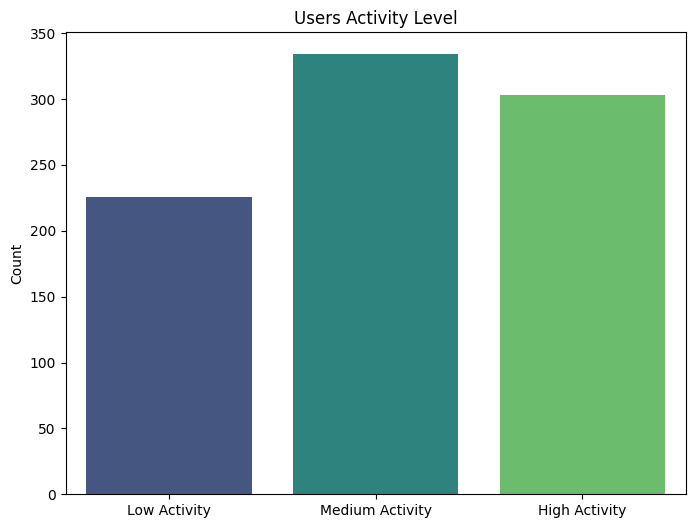

In [51]:
# Classify users into groups based on total steps
bins = [0, 5000, 10000, np.inf]
labels = ['Low Activity', 'Medium Activity', 'High Activity']
daily_activity['ActivityLevel'] = pd.cut(daily_activity['TotalSteps'], bins=bins, labels=labels)

# Calculate the proportion of users in each category
activity_level_counts = daily_activity['ActivityLevel'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=activity_level_counts.index, y=activity_level_counts.values, palette='viridis')
plt.title('Users Activity Level')
plt.ylabel('Count')
plt.show()


Average Daily Steps by Users


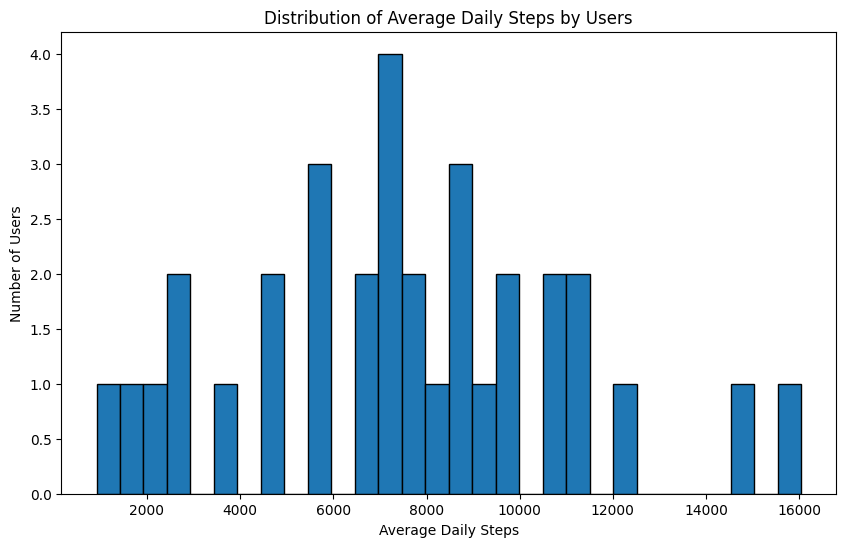

In [52]:
# Plot a histogram of average daily steps by user
plt.figure(figsize=(10,6))
plt.hist(daily_steps.groupby('Id')['StepTotal'].mean(), bins=30, edgecolor='black',)
plt.xlabel('Average Daily Steps')
plt.ylabel('Number of Users')
plt.title('Distribution of Average Daily Steps by Users')
plt.show()


From this histogram,we can see that most users tend to have a low or moderate average daily steps, which could be useful information for Bellabeat's marketing strategy.Bellabeat might want to focus on marketing strategies that encourage and incentivize more daily physical activity.

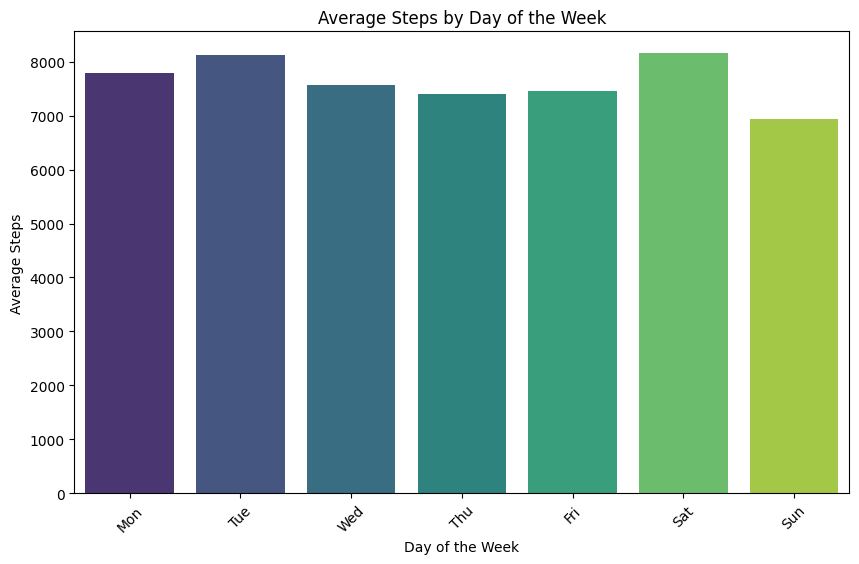

In [99]:
# Create a dictionary to map day of the week
days = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

# Replace the 'DayOfWeek' integers with day names
daily_activity['DayOfWeek'] = daily_activity['DayOfWeek'].map(days)

# Order the days of the week for proper display
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Group the data by day of the week and calculate the average steps
grouped = daily_activity.groupby('DayOfWeek')['TotalSteps'].mean().reindex(day_order).reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='DayOfWeek', y='TotalSteps', palette='viridis')
plt.title('Average Steps by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.show()


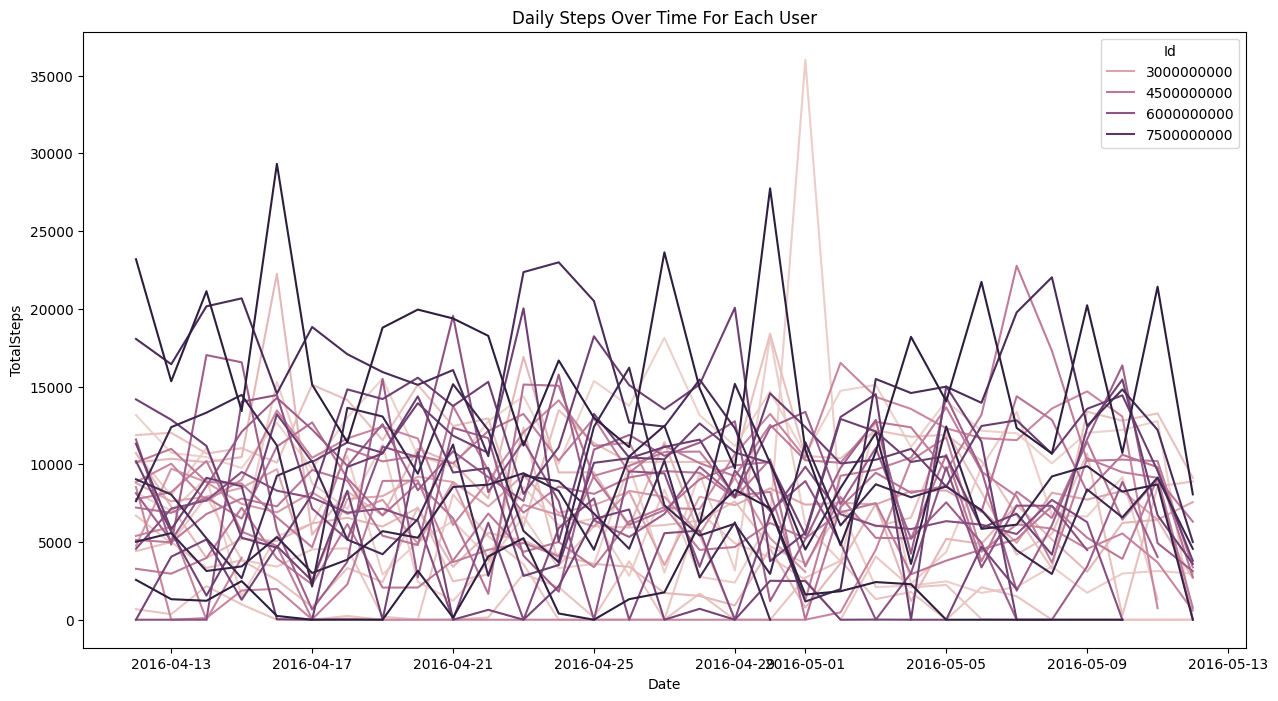

In [54]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Date", y="TotalSteps", hue="Id", data=daily_activity)
plt.title('Daily Steps Over Time For Each User')
plt.show()

Pie Chart: Time Spent in Different Intensity Levels for Each User



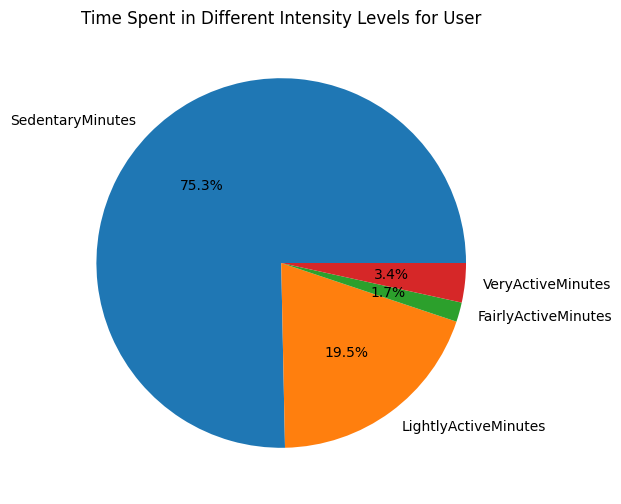

In [55]:
# Pie chart for a selected user for clarity
selected_user = daily_intensities[daily_intensities['Id']==daily_intensities['Id'].unique()[0]]
avg_intensities = selected_user[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].mean()

plt.figure(figsize=(10,6))
plt.pie(avg_intensities, labels=avg_intensities.index, autopct='%1.1f%%')
plt.title('Time Spent in Different Intensity Levels for User')
plt.show()


Heatmap of Correlation among various daily activities:

Understanding how different daily activity measures correlate with each other can help in developing a more nuanced understanding of the users' activity patterns.

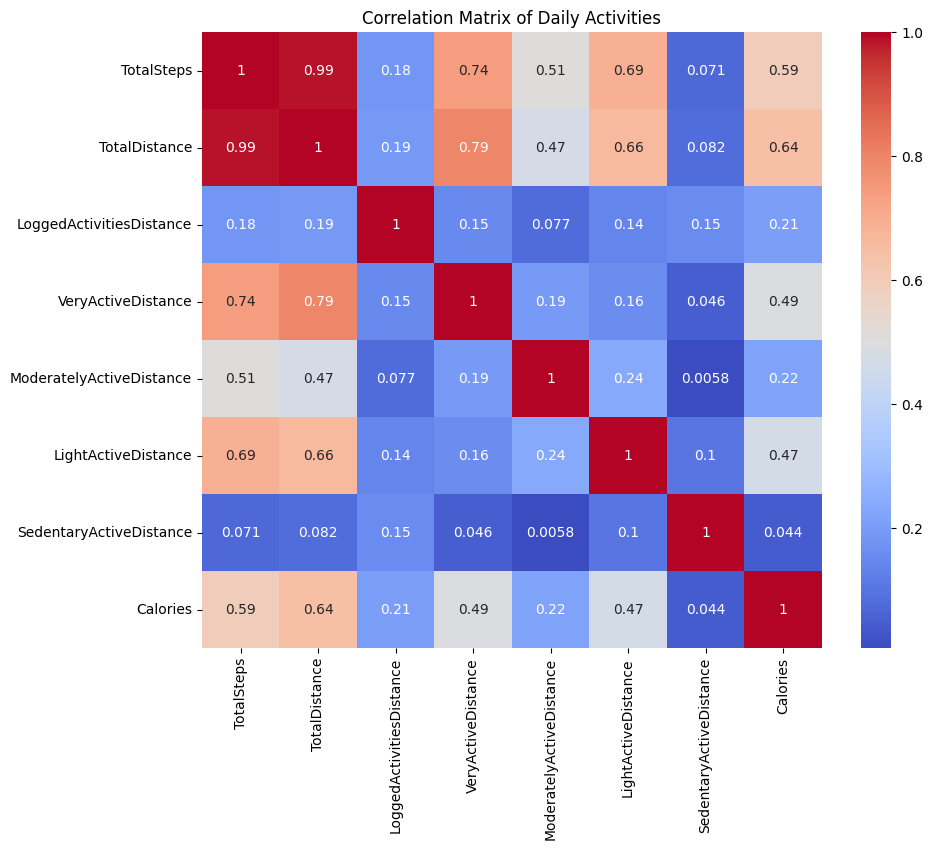

In [56]:
# Select the columns to include in the correlation matrix
cols_to_include = ['TotalSteps', 'TotalDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',
                   'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'Calories']

# Calculate the correlation matrix
correlation_matrix = daily_activity[cols_to_include].corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Activities')
plt.show()


We can see that calories and total distance are correlated.



Scatterplot of Total Distance vs Calories:


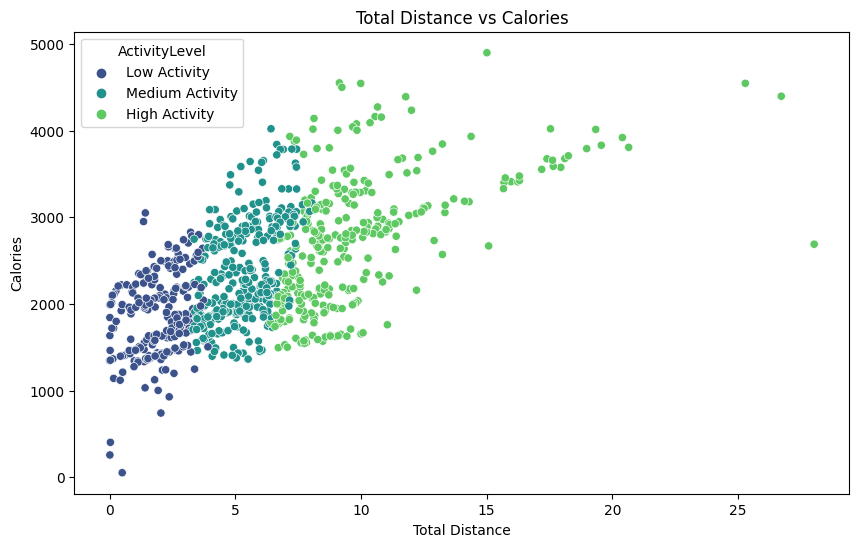

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalDistance', y='Calories', data=daily_activity, hue='ActivityLevel', palette='viridis')
plt.title('Total Distance vs Calories')
plt.xlabel('Total Distance')
plt.ylabel('Calories')
plt.show()


Correlation between Step Count and Calorie Burn


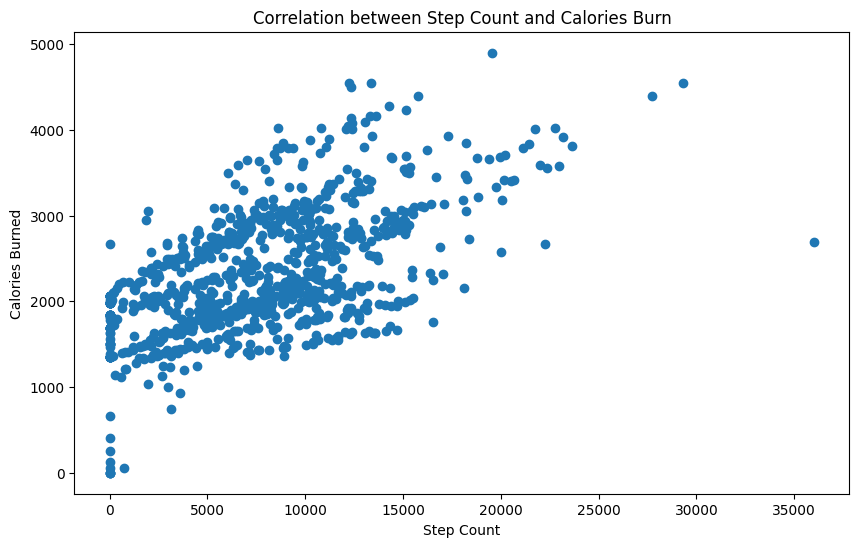

In [58]:
# Merge the step count and calorie data
df_step_calories = pd.merge(daily_steps, daily_calories, on=['Id', 'Date'])

# Plotting the correlation between steps and calories
plt.figure(figsize=(10,6))
plt.scatter(df_step_calories['StepTotal'], df_step_calories['Calories'])
plt.xlabel('Step Count')
plt.ylabel('Calories Burned')
plt.title('Correlation between Step Count and Calories Burn')
plt.show()


We can observe a positive correlation

User Activity Variation by Hours:

Trying to understand what times of the day users are most active. This can be valuable for marketing efforts related to promoting active lifestyles or syncing fitness goals with the users' active hours.



In [59]:
minute_mets.info()
# minute_mets['ActivityMinute'] = pd.to_datetime(minute_mets['ActivityMinute'],errors = "ignore")

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1325580 entries, 0 to 1325579

Data columns (total 4 columns):

 #   Column          Non-Null Count    Dtype         

---  ------          --------------    -----         

 0   Id              1325580 non-null  int64         

 1   ActivityMinute  1325580 non-null  object        

 2   METs            1325580 non-null  int64         

 3   Time            1325580 non-null  datetime64[ns]

dtypes: datetime64[ns](1), int64(2), object(1)

memory usage: 40.5+ MB


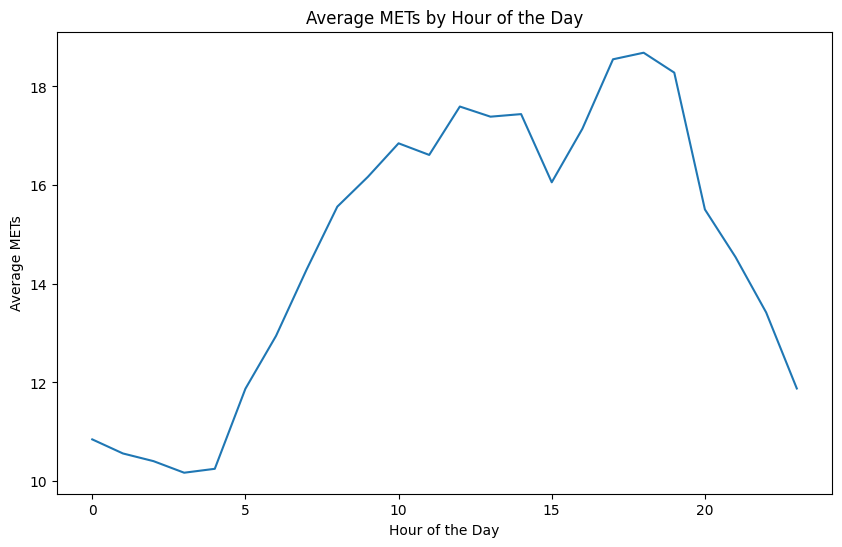

In [60]:
import seaborn as sns

# Extract hour from ActivityMinute column
minute_mets['ActivityHour'] = minute_mets['Time'].dt.hour

# Calculate mean METs for each hour
avg_METs_by_hour = minute_mets.groupby('ActivityHour')['METs'].mean().reset_index()

# Plot the average METs by hour
plt.figure(figsize=(10,6))
sns.lineplot(x='ActivityHour', y='METs', data=avg_METs_by_hour)
plt.xlabel('Hour of the Day')
plt.ylabel('Average METs')
plt.title('Average METs by Hour of the Day')
plt.show()


We can see that users are mostly active through the hours 10 to 20

In [93]:
daily_activity.head()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityLevel,DayOfWeek
Date,,,,,,,,,,,,,,,,
2016-04-12,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,High Activity,1
2016-04-13,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,High Activity,2
2016-04-14,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,High Activity,3
2016-04-15,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Medium Activity,4
2016-04-16,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,High Activity,5


Daily Use of Smart Devices

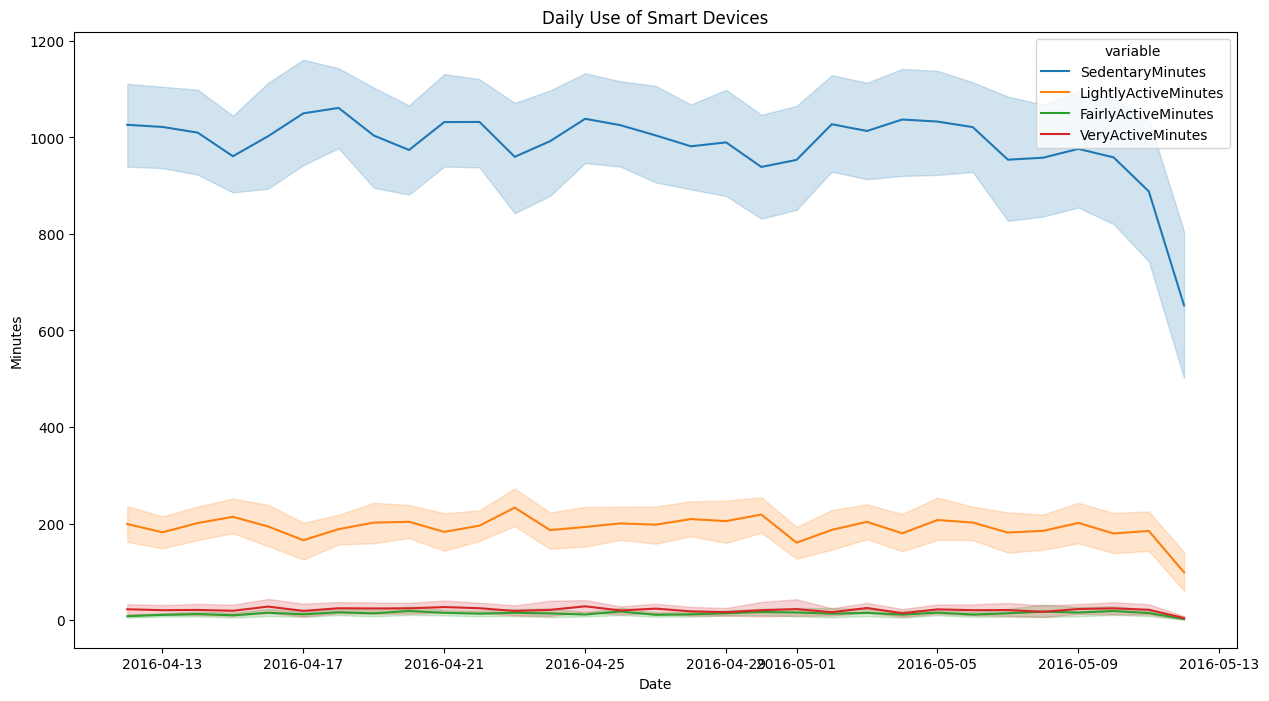

In [97]:
# Convert data from wide format to long format
df = pd.melt(daily_intensities, id_vars=['Id', 'Date'],
                                 value_vars=['SedentaryMinutes', 'LightlyActiveMinutes',
                                             'FairlyActiveMinutes', 'VeryActiveMinutes'])

# Create a figure and axis
plt.figure(figsize=(15,8))

# Create the plot
sns.lineplot(data=df, x='Date', y='value', hue='variable')

# Set plot title and labels
plt.title('Daily Use of Smart Devices')
plt.xlabel('Date')
plt.ylabel('Minutes')

# Show the plot
plt.show()

This line plot shows how the daily use of smart devices changes over time for different activity levels



---



#### Sleep data Analysis

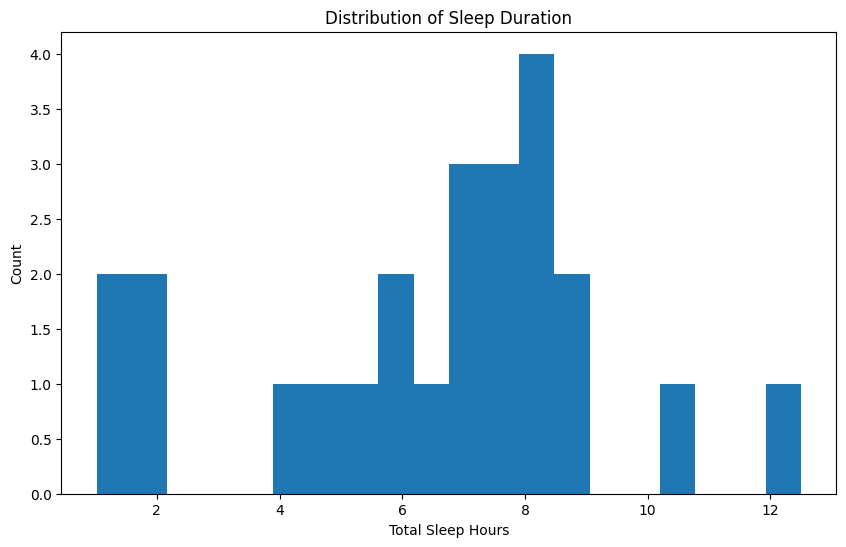

In [61]:
# Calculate total sleep time in hours
sleep_day['TotalSleepHours'] = sleep_day['TotalMinutesAsleep']/60

# Plot the distribution of sleep duration
plt.figure(figsize=(10,6))
plt.hist(sleep_day['TotalSleepHours'], bins=20)
plt.xlabel('Total Sleep Hours')
plt.ylabel('Count')
plt.title('Distribution of Sleep Duration')
plt.show()


Pie chart of Sleep Efficiency:

 We can calculate and categorize sleep efficiency into three and then visualize the proportion of each category.

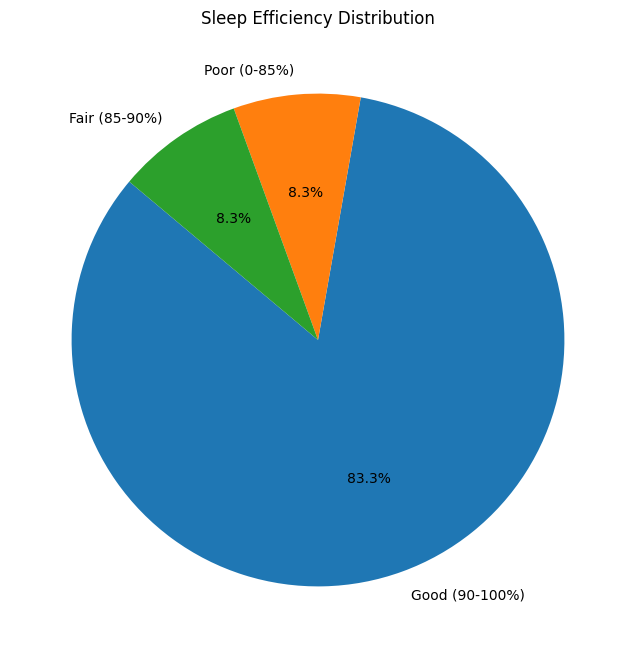

In [62]:
# Define bins for sleep efficiency
bins = [0, 85, 90, 100]
labels = ['Poor (0-85%)', 'Fair (85-90%)', 'Good (90-100%)']
sleep_day['SleepEfficiency'] = (sleep_day['TotalMinutesAsleep'] / sleep_day['TotalTimeInBed']) * 100

# Bin the sleep efficiency data
sleep_day['SleepEfficiencyCategory'] = pd.cut(sleep_day['SleepEfficiency'], bins=bins, labels=labels)

# Calculate the proportions
sleep_efficiency_proportions = sleep_day['SleepEfficiencyCategory'].value_counts(normalize=True)

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(sleep_efficiency_proportions, labels=sleep_efficiency_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Sleep Efficiency Distribution')
plt.show()


Histogram of sleep efficiency:

Plotting a histogram of sleep efficiency can help us understand the distribution of this variable.

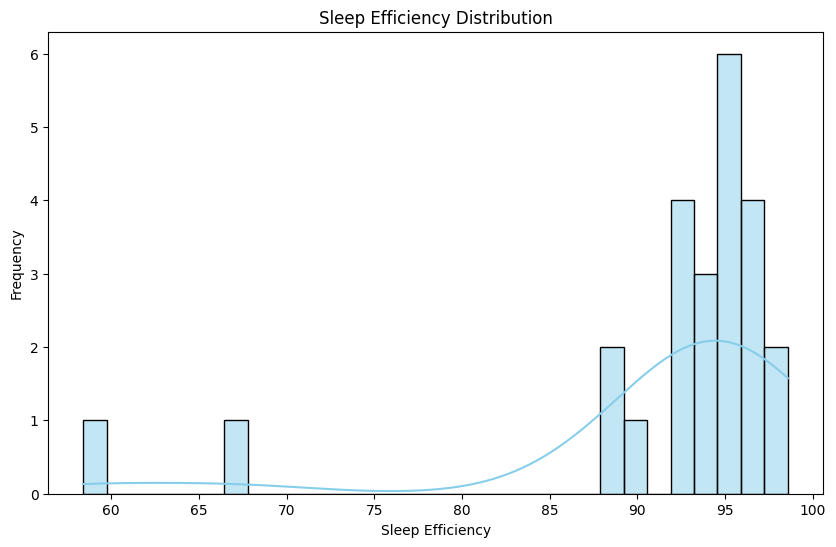

In [63]:
# Create a new column 'SleepEfficiency'
sleep_day['SleepEfficiency'] = (sleep_day['TotalMinutesAsleep'] / sleep_day['TotalTimeInBed']) * 100

# Plot a histogram of Sleep Efficiency
plt.figure(figsize=(10,6))
sns.histplot(data=sleep_day, x='SleepEfficiency', bins=30, color='skyblue', kde=True)
plt.title('Sleep Efficiency Distribution')
plt.xlabel('Sleep Efficiency')
plt.ylabel('Frequency')
plt.show()


The 'kde' line provides an estimate of the probability density function

Violinplot of Sleep Efficiency by Activity Level:

A violinplot combines a boxplot with a kernel density plot to show the distribution of a numerical variable across different categories.



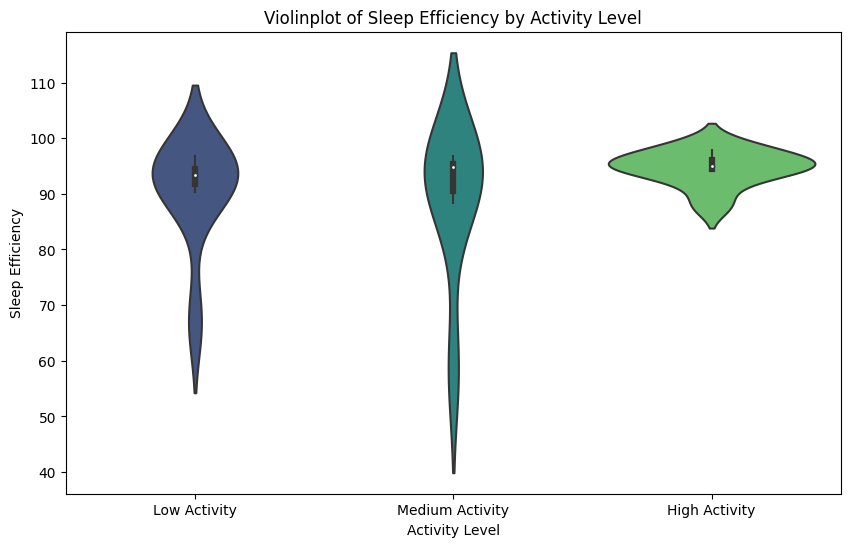

In [64]:
# Merge sleep_day and daily_activity dataframes on 'Id' and 'Date'
merged_df = pd.merge(daily_activity, sleep_day, on=['Id', 'Date'], how='inner')

plt.figure(figsize=(10,6))
sns.violinplot(x='ActivityLevel', y='SleepEfficiency', data=merged_df, palette='viridis')
plt.title('Violinplot of Sleep Efficiency by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Sleep Efficiency')
plt.show()


Insight: This violinplot shows the distribution of sleep efficiency across different activity levels. The wider sections of the violin plot represent a higher probability that users will have a given sleep efficiency.

##### Heart Rate

Line Chart: Average Heart Rate Over Time For Each User

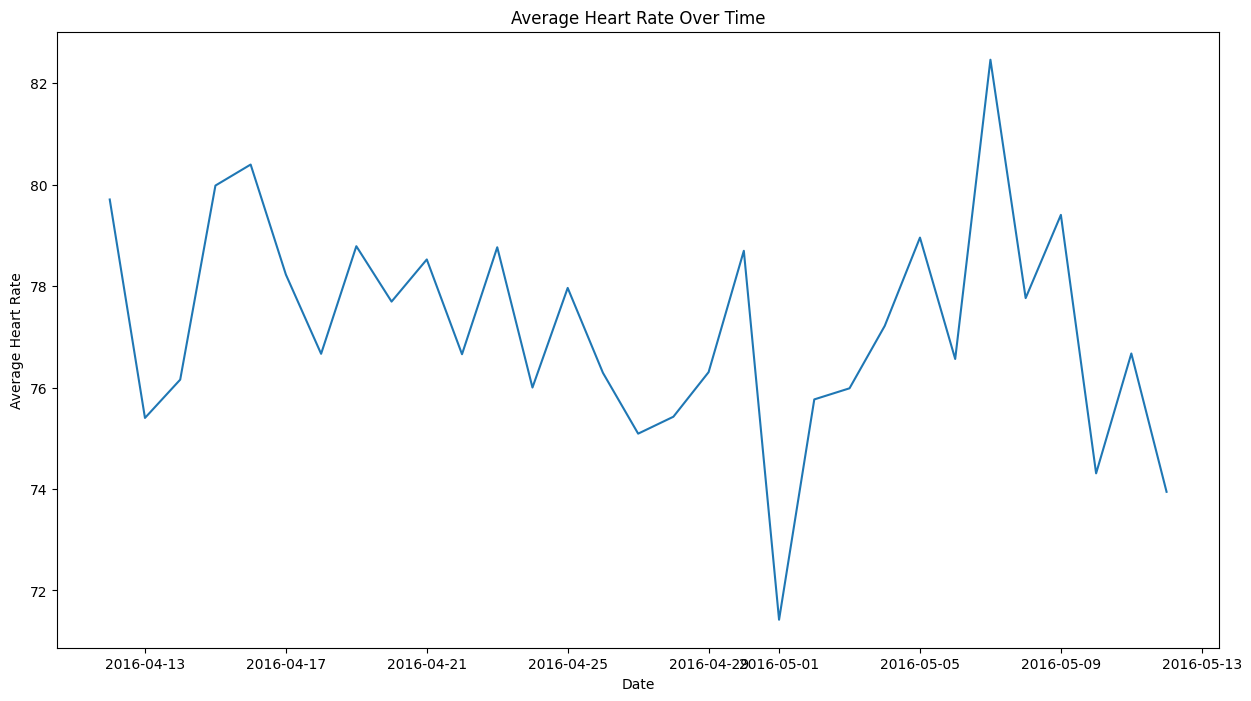

In [65]:
heart_rate['Date'] = heart_rate['Time'].dt.date
avg_heart_rate = heart_rate.groupby('Date')['Value'].mean().reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Value', data=avg_heart_rate)
plt.title('Average Heart Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Average Heart Rate')
plt.show()


The line chart shows the average heart rate of all users on each day.

In [67]:
heart_rate["Minute"] = heart_rate['Time'].dt.minute
minute_mets["Minute"] = minute_mets['Time'].dt.minute


<ipython-input-79-a1e6f87e5a94>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

  heart_rate_mean = heart_rate.groupby('Id').mean().reset_index()

<ipython-input-79-a1e6f87e5a94>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

  minute_mets_mean = minute_mets.groupby('Id').mean().reset_index()


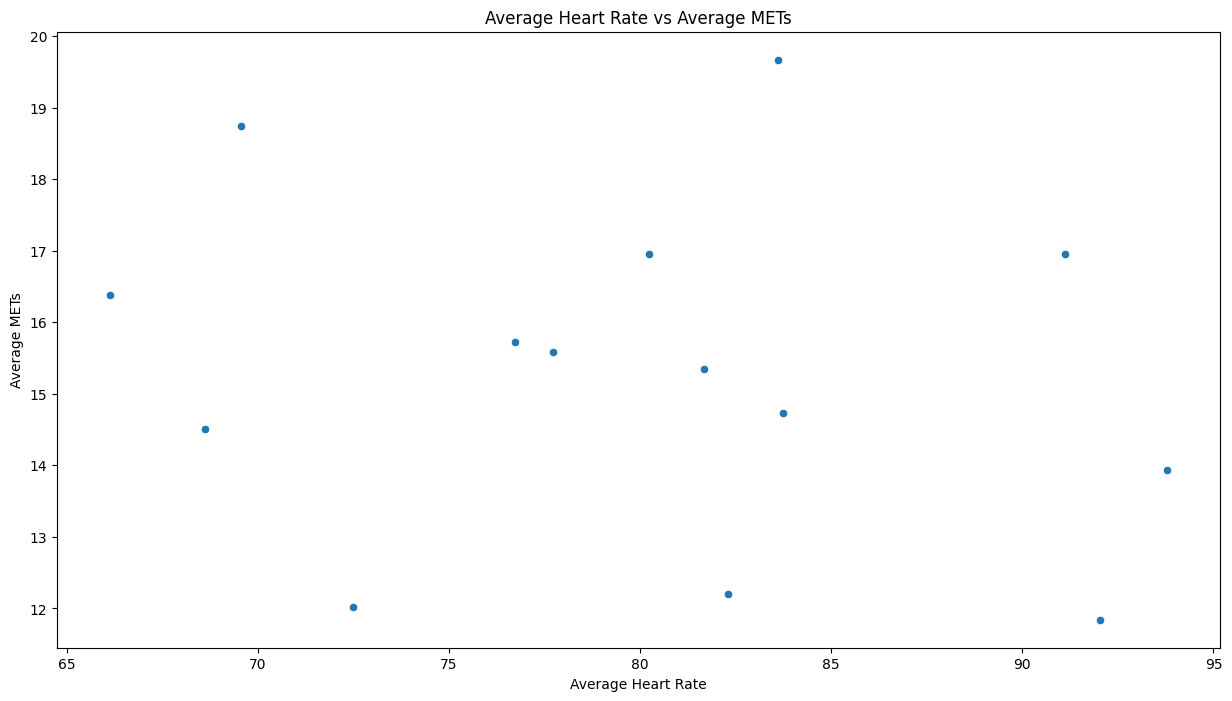

In [79]:
heart_rate_mean = heart_rate.groupby('Id').mean().reset_index()
minute_mets_mean = minute_mets.groupby('Id').mean().reset_index()

# Merge the dataframes
merged_data = pd.merge(heart_rate_mean, minute_mets_mean, on='Id')

# Plot the scatter plot
plt.figure(figsize=(15,8))
sns.scatterplot(x='Value', y='METs', data=merged_data)
plt.title('Average Heart Rate vs Average METs')
plt.xlabel('Average Heart Rate')
plt.ylabel('Average METs')
plt.show()

Histogram: Sleep Duration Frequency Distribution


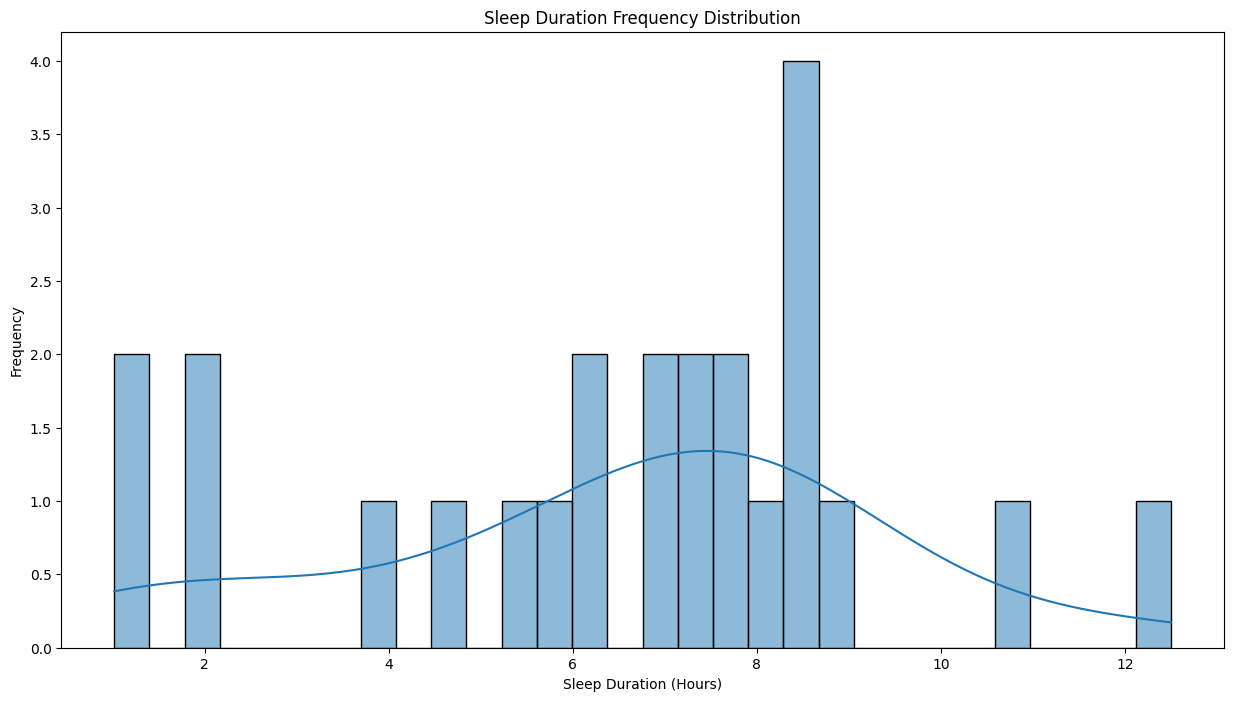

In [98]:
# Convert minutes to hours for better interpretability
sleep_day['TotalHoursAsleep'] = sleep_day['TotalMinutesAsleep'] / 60

plt.figure(figsize=(15,8))
sns.histplot(data=sleep_day, x='TotalHoursAsleep', bins=30, kde=True)
plt.title('Sleep Duration Frequency Distribution')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Frequency')
plt.show()


Most people sleep around 8

Box Plot: Weight Summary Statistics and Outliers



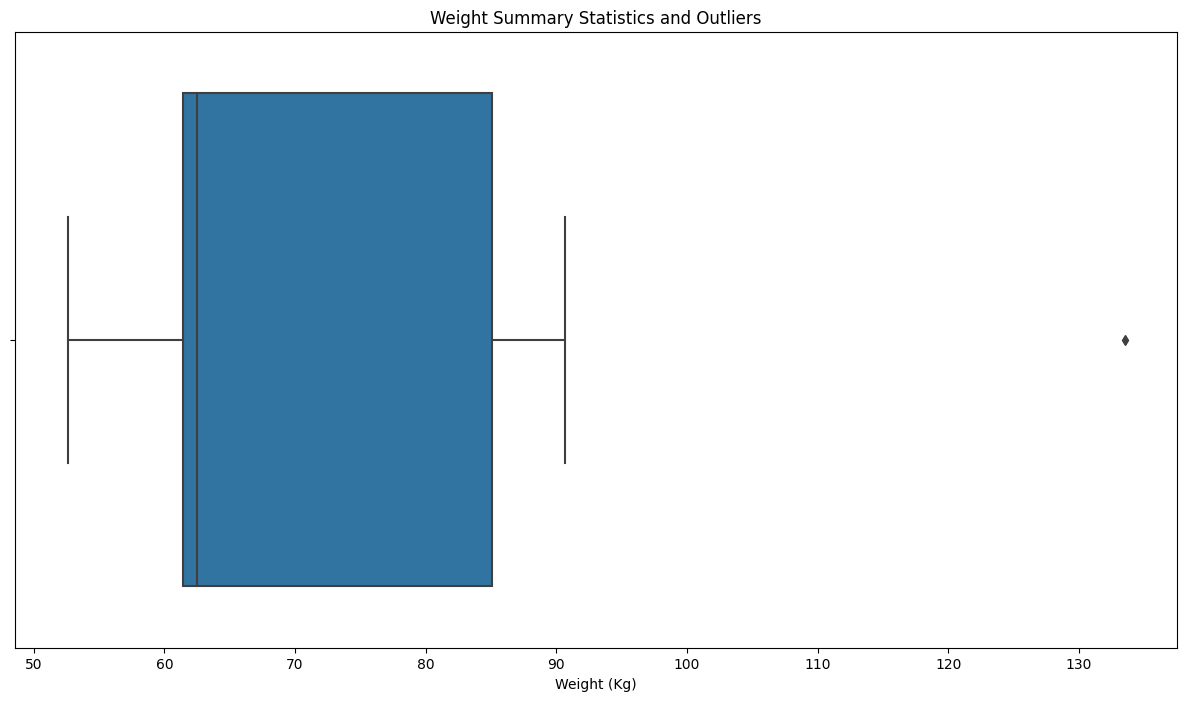

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(x=weight_log_['WeightKg'])
plt.title('Weight Summary Statistics and Outliers')
plt.xlabel('Weight (Kg)')
plt.show()


Here, 'WeightKg' is the weight in kilograms. The box plot shows the summary statistics and outliers of weight for all users.

#### Analysis Conclusion

Most of the users have moderate to high activity levels, indicated by the significant number of steps taken and active minutes.

Sleep duration for most users falls within the recommended range of 7-9 hours. However, there are some outliers who sleep significantly less or more than the recommended amount.

The majority of users exhibit high sleep efficiency, suggesting that they are getting quality sleep.

There is a positive correlation between total steps taken and calories burned, suggesting that users who take more steps burn more calories.

Users who get more sleep also tend to burn more calories, possibly indicating a more active lifestyle during their waking hours.

These findings suggest that the users of the Fitbit device lead active lifestyles with reasonable sleep patterns. However, the data also show that these habits vary by individual user and over time. These patterns and correlations can provide valuable insights for a company like Bellabeat, which aims to develop products that help women reach their health and wellness goals.

### Act Phase

Based on the analysis and visualizations, here are the top high-level insights and recommendations:<br>

* **Daily Activity Levels**: The majority of Fitbit users spend more time sitting down than moving around. This knowledge could be used by Bellabeat to develop programs or features that encourage users to be more active. For instance, they might add prompts to get moving after a certain amount of inactivity or gamify exercise with obstacles and rewards.<br>
* **Steps Count**:With an average of about 8000 steps per day, users appear to maintain a fairly consistent step count. It's critical to motivate users to walk the recommended 10,000 steps per day. As a result, Bellabeat could add a feature to their app that would allow users to set daily step goals and see their progress visually throughout the day.<br>
* **Sleep Efficiency**:Most users have high sleep efficiency, which is a sign of high-quality sleep. By offering insights into users' sleep stages or providing tailored advice to improve sleep quality based on user data, Bellabeat could further improve their sleep tracking feature.<br>
* **Physical Activity** Patterns:Over the course of the week, there is a pattern in the level of physical activity, with users being more active during the weekdays. Bellabeat could make use of this data to modify app notifications and reminders based on users' weekly schedules.<br>
* **Heart Rate and METs**:There isn't much of a relationship between users' heart rates and METs, which raises the possibility that users aren't doing intense workouts that would significantly increase heart rates. Bellabeat might add tools that inspire and direct users to engage in more intense physical activity.
As for the following steps, Bellabeat would benefit from performing a comparable analysis on their own user data, if available, and comparing the conclusions. To gather more qualitative information about the habits and preferences of their users, they might also think about conducting surveys or user interviews.<br>

Additional investigation could be conducted to broaden these findings. For instance, it might be instructive to examine how the habits of Fitbit users vary depending on demographic variables like age, gender, or location. Additional information that wasn't present in the current dataset would be needed for this